In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
path_file = f'loan_data_total.csv'

In [3]:
df_loan = pd.read_csv(path_file, sep=';', low_memory=False)

/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/3903226161.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/3903226161.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Não Default', 'Default'])
/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/3903226161.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/3903226161.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

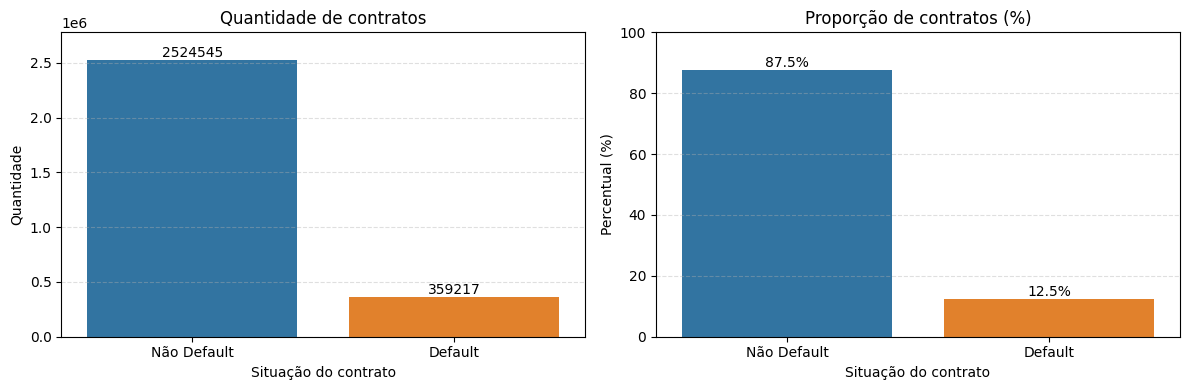

In [5]:
contagem = df_loan['default'].value_counts().sort_index()

# Proporção (%)
proporcao = contagem / contagem.sum() * 100

# Criando a figura com 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Paleta consistente
palette_default = {
    0: sns.color_palette()[0],  # Não Default
    1: sns.color_palette()[1]   # Default
}

# =========================
# Gráfico 1: Quantidade absoluta
# =========================
sns.barplot(
    x=contagem.index,
    y=contagem.values,
    ax=axes[0],
    palette=[palette_default[i] for i in contagem.index]
)

axes[0].set_title('Quantidade de contratos')
axes[0].set_xlabel('Situação do contrato')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticklabels(['Não Default', 'Default'])
axes[0].set_ylim(0, contagem.max() * 1.1)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.4)

# Valores no topo das barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')

# =========================
# Gráfico 2: Proporção (%)
# =========================
sns.barplot(
    x=proporcao.index,
    y=proporcao.values,
    ax=axes[1],
    palette=[palette_default[i] for i in contagem.index]
)

axes[1].set_title('Proporção de contratos (%)')
axes[1].set_xlabel('Situação do contrato')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xticklabels(['Não Default', 'Default'])
axes[1].set_ylim(0, 100)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.4)

# Percentuais no topo das barras
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.savefig('figuras//quantidade_default.png', dpi=600, bbox_inches='tight')
plt.show()

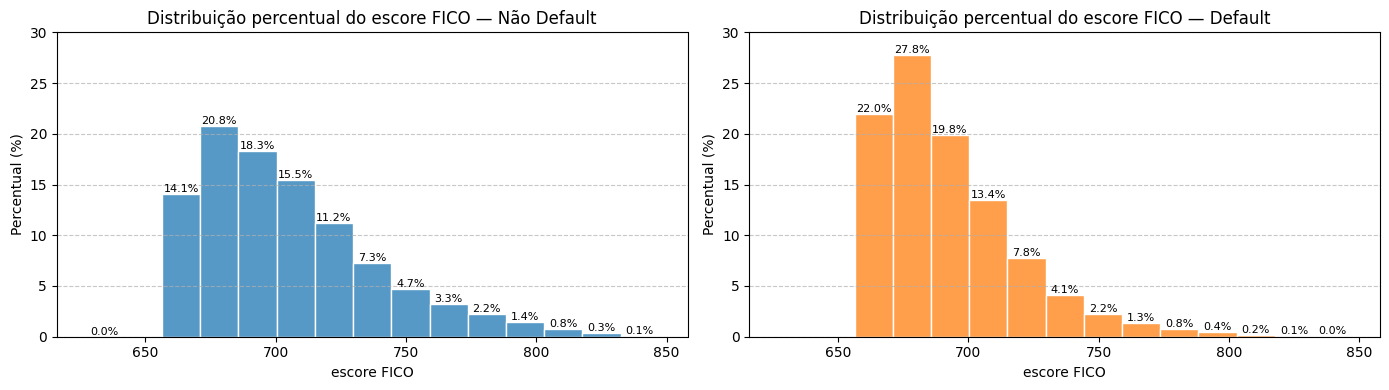

In [8]:
# Dados
fico_nao_default = df_loan.loc[df_loan['default'] == 0, 'escore_fico'].dropna()
fico_default     = df_loan.loc[df_loan['default'] == 1, 'escore_fico'].dropna()

# Bins comuns para comparação justa
bins = np.histogram_bin_edges(
    df_loan['escore_fico'].dropna(),
    bins=15
)

# Figura com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# =========================
# Esquerda — Não Default (azul)
# =========================
sns.histplot(
    fico_nao_default,
    bins=bins,
    stat='percent',
    ax=axes[0],
    color=sns.color_palette()[0],
    edgecolor='white'
)

axes[0].set_title('Distribuição percentual do escore FICO — Não Default')
axes[0].set_xlabel('escore FICO')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_ylim(0, 30)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Valores (%) sobre as barras
for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=8
        )

# =========================
# Direita — Default (laranja)
# =========================
sns.histplot(
    fico_default,
    bins=bins,
    stat='percent',
    ax=axes[1],
    color=sns.color_palette()[1],
    edgecolor='white'
)

axes[1].set_title('Distribuição percentual do escore FICO — Default')
axes[1].set_xlabel('escore FICO')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_ylim(0, 30)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Valores (%) sobre as barras
for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.savefig('figuras//escore_fico_default.png', dpi=600, bbox_inches='tight')
plt.show()


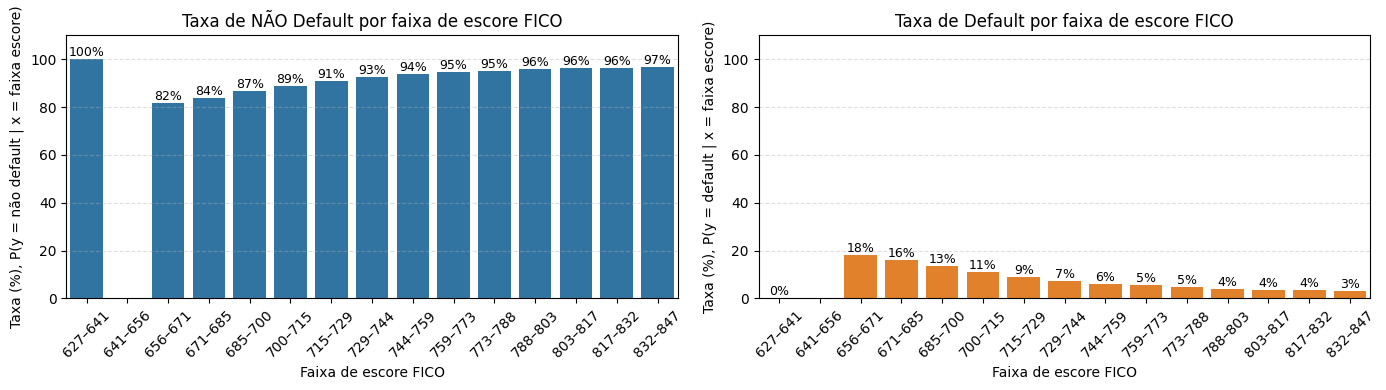

In [11]:
# Bins do escore_fico
bins = np.histogram_bin_edges(
    df_loan['escore_fico'].dropna(),
    bins=15
)

# Rótulos das faixas
labels = [f'{int(bins[i])}–{int(bins[i+1])}' for i in range(len(bins) - 1)]

# Criando a variável de faixa
df_loan['faixa_score_fico'] = pd.cut(
    df_loan['escore_fico'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Taxa de default (%)
taxa_default = (
    df_loan
    .groupby('faixa_score_fico', observed=True)['default']
    .mean()
    .mul(100)
    .reset_index(name='taxa_default')
)

# Taxa de não default (%)
taxa_nao_default = taxa_default.copy()
taxa_nao_default['taxa_nao_default'] = 100 - taxa_nao_default['taxa_default']

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

# =========================
# Esquerda — Não Default (azul)
# =========================
sns.barplot(
    data=taxa_nao_default,
    x='faixa_score_fico',
    y='taxa_nao_default',
    ax=axes[0],
    color=sns.color_palette()[0]
)

axes[0].set_title('Taxa de NÃO Default por faixa de escore FICO')
axes[0].set_xlabel('Faixa de escore FICO')
axes[0].set_ylabel('Taxa (%), P(y = não default | x = faixa escore)')
axes[0].set_ylim(0, 110)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.4)
axes[0].tick_params(axis='x', rotation=45)

# Valores sobre as barras
for p in axes[0].patches:
    axes[0].annotate(
        f'{p.get_height():.0f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# =========================
# Direita — Default (laranja)
# =========================
sns.barplot(
    data=taxa_default,
    x='faixa_score_fico',
    y='taxa_default',
    ax=axes[1],
    color=sns.color_palette()[1]
)

axes[1].set_title('Taxa de Default por faixa de escore FICO')
axes[1].set_xlabel('Faixa de escore FICO')
axes[1].set_ylabel('Taxa (%), P(y = default | x = faixa escore)')
axes[1].set_ylim(0, 110)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.4)
axes[1].tick_params(axis='x', rotation=45)

# Valores sobre as barras
for p in axes[1].patches:
    axes[1].annotate(
        f'{p.get_height():.0f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('figuras//taxa_escore_fico_default.png', dpi=600, bbox_inches='tight')
plt.show()



/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/2221510361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/qf/kc1bvcc94rn94r3xhf1jbj1w0000gn/T/ipykernel_22889/2221510361.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Default', 'Default'])


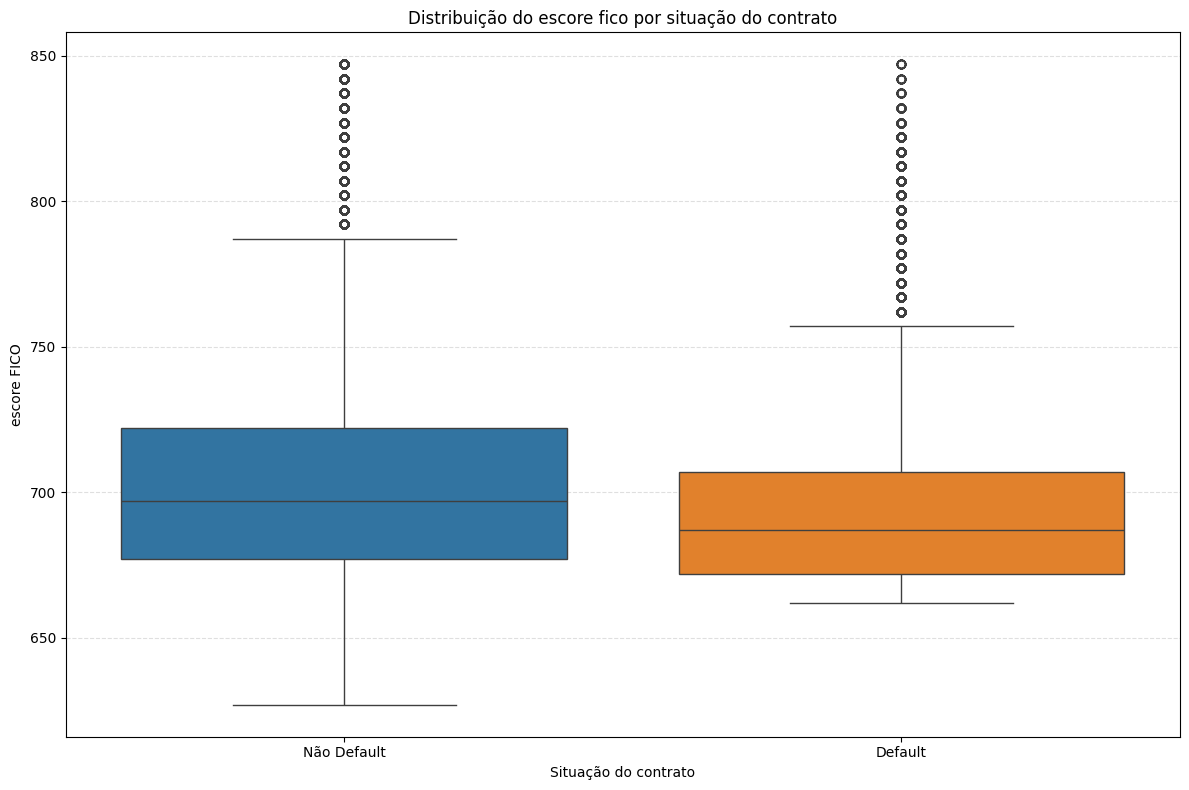

In [12]:
plt.figure(figsize=(12, 8))
df_loan['default'] = df_loan['default'].astype(int)

palette_default = {
    0: sns.color_palette()[0],  # Não Default
    1: sns.color_palette()[1]   # Default
}

ax = sns.boxplot(
    data=df_loan,
    x='default',
    y='escore_fico',
    order=[0, 1],
    palette=[palette_default[i] for i in contagem.index]
)

# Títulos e rótulos
ax.set_title('Distribuição do escore fico por situação do contrato')
ax.set_xlabel('Situação do contrato')
ax.set_ylabel('escore FICO')

# Renomeando os ticks do eixo X
ax.set_xticklabels(['Não Default', 'Default'])

# Grid no eixo Y
ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('figuras//boxplot_escore_figco_default.png', dpi=600, bbox_inches='tight')
plt.show()
